<a href="https://colab.research.google.com/github/sara286015/Kaggle_Submissions/blob/main/Terrain_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('train.csv')
df

,id,location_type,altitude,area_sq_m,slope_deg,soil_quality,distance_city_center_km,distance_to_school_km,distance_to_hospital_km,distance_to_market_km,...,distance_nearest_park_km,proximity_public_transport,pedestrian_index,employer_density,school_density,hospital_density,amenities_score,price_per_m2,land_area_m2,target
0,id_0,moor,860,384,29.9,0.06,14.7,0.4,6.5,0.2,...,0.59,1,0.24,19.2,2.1,4.9,0.49,19.53,384,8490.76
1,id_1,canyon,1294,543,7.1,0.63,0.8,9.0,9.5,5.2,...,1.23,1,0.62,114.9,12.5,3.8,0.81,21.63,543,13011.02
2,id_2,cliff,1130,1067,5.3,0.77,1.7,5.6,7.8,7.0,...,4.34,1,0.02,54.4,2.9,0.7,0.93,16.70,1067,16913.06
3,id_3,grove,1095,864,34.4,0.99,22.3,8.7,8.0,9.4,...,2.92,1,0.56,11.7,1.6,0.9,0.56,23.73,864,19270.35
4,id_4,grove,1638,1208,30.2,0.01,23.4,8.3,5.3,1.8,...,2.74,1,0.82,69.2,1.7,3.7,0.14,25.15,1208,30719.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,id_1495,plateau,1121,724,29.4,0.62,64.7,2.1,5.8,7.0,...,4.40,1,0.19,4.1,25.5,0.9,0.07,11.47,724,9684.05
1496,id_1496,forest,130,716,20.7,0.13,7.7,3.4,1.7,3.6,...,2.47,1,0.38,96.9,4.5,1.2,0.18,15.88,716,10802.92
1497,id_1497,canyon,2852,988,30.4,0.12,112.0,7.8,4.2,0.5,...,1.75,1,0.84,11.0,6.3,1.0,0.38,19.67,988,20356.20
1498,id_1498,cliff,1194,726,27.8,0.84,37.4,1.9,4.6,1.6,...,3.98,1,0.36,22.5,1.8,2.0,0.18,23.87,726,18820.83


In [ ]:
df.isnull().sum()

,0
id,0
location_type,0
altitude,0
area_sq_m,0
slope_deg,0
soil_quality,0
distance_city_center_km,0
distance_to_school_km,0
distance_to_hospital_km,0
distance_to_market_km,0


In [ ]:
x=df.drop(['id', 'target'], axis=1)
y=df['target']
x

,location_type,altitude,area_sq_m,slope_deg,soil_quality,distance_city_center_km,distance_to_school_km,distance_to_hospital_km,distance_to_market_km,distance_to_industry_km,...,avg_property_age,distance_nearest_park_km,proximity_public_transport,pedestrian_index,employer_density,school_density,hospital_density,amenities_score,price_per_m2,land_area_m2
0,moor,860,384,29.9,0.06,14.7,0.4,6.5,0.2,11.8,...,11.4,0.59,1,0.24,19.2,2.1,4.9,0.49,19.53,384
1,canyon,1294,543,7.1,0.63,0.8,9.0,9.5,5.2,18.0,...,18.9,1.23,1,0.62,114.9,12.5,3.8,0.81,21.63,543
2,cliff,1130,1067,5.3,0.77,1.7,5.6,7.8,7.0,15.9,...,31.3,4.34,1,0.02,54.4,2.9,0.7,0.93,16.70,1067
3,grove,1095,864,34.4,0.99,22.3,8.7,8.0,9.4,10.9,...,28.1,2.92,1,0.56,11.7,1.6,0.9,0.56,23.73,864
4,grove,1638,1208,30.2,0.01,23.4,8.3,5.3,1.8,8.4,...,32.0,2.74,1,0.82,69.2,1.7,3.7,0.14,25.15,1208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,plateau,1121,724,29.4,0.62,64.7,2.1,5.8,7.0,10.5,...,11.1,4.40,1,0.19,4.1,25.5,0.9,0.07,11.47,724
1496,forest,130,716,20.7,0.13,7.7,3.4,1.7,3.6,5.8,...,13.1,2.47,1,0.38,96.9,4.5,1.2,0.18,15.88,716
1497,canyon,2852,988,30.4,0.12,112.0,7.8,4.2,0.5,11.9,...,28.2,1.75,1,0.84,11.0,6.3,1.0,0.38,19.67,988
1498,cliff,1194,726,27.8,0.84,37.4,1.9,4.6,1.6,0.5,...,16.4,3.98,1,0.36,22.5,1.8,2.0,0.18,23.87,726


#Evaluate linear regression model


**Reasoning**:
Evaluate the Linear Regression model using MSE and R2 score.

# Task
Perform linear regression and polynomial regression on the dataset, evaluate both models using Mean Squared Error and R2 score, and compare their performance.

## Split the data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets as instructed.



In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Train linear regression model

### Subtask:
Train a Linear Regression model on the training data.


**Reasoning**:
Train a Linear Regression model on the training data using the instructions provided.



In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

**Reasoning**:
The error message indicates that there are non-numeric values in the training data that cannot be converted to floats. This is likely due to the 'location_type' column which is a categorical feature. I need to handle these categorical features before training the model. I will use one-hot encoding to convert the 'location_type' column into numerical representation.



**Reasoning**:
The error indicates there are still non-numeric values in the dataframe, likely in other categorical columns besides 'location_type'. I need to identify all categorical columns and apply one-hot encoding to them before fitting the model.



## Evaluate linear regression model

### Subtask:
Predict on the test data and calculate the Mean Squared Error and R2 score for the Linear Regression model.


**Reasoning**:
Predict on the test data and calculate the Mean Squared Error and R2 score for the Linear Regression model.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_linear = linear_model.predict(x_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f"Linear Regression MSE: {mse_linear}")
print(f"Linear Regression R2 Score: {r2_linear}")

Linear Regression MSE: 1799196.2551169985
Linear Regression R2 Score: 0.9555658437673825


## Compare models



In [ ]:
print("Linear Regression Model Performance:")
print(f"Linear Regression MSE: {mse_linear:.2f}")
print(f"Linear Regression R2 Score: {r2_linear:.4f}")

Linear Regression Model Performance:
Linear Regression MSE: 1799196.26
Linear Regression R2 Score: 0.9556


#Train ridge regression model


In [ ]:
from sklearn.linear_model import Ridge

ridge_model = Ridge()
ridge_model.fit(x_train, y_train)

Ridge()

#Evaluate ridge regression



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_ridge = ridge_model.predict(x_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R2 Score: {r2_ridge}")

Ridge Regression MSE: 1791133.9751188327
Ridge Regression R2 Score: 0.9557649552361901


#Train lasso regression

In [ ]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()
lasso_model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.162e+07, tolerance: 4.116e+06
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [ ]:
#evaluate lasso
from sklearn.metrics import mean_squared_error, r2_score

y_pred_lasso = lasso_model.predict(x_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Lasso Regression R2 Score: {r2_lasso}")

Lasso Regression MSE: 1769391.3739677488
Lasso Regression R2 Score: 0.9563019250824218


In [ ]:
#compare models
print("Model Performance Comparison:")
print(f"Linear Regression MSE: {mse_linear:.2f}")
print(f"Linear Regression R2 Score: {r2_linear:.4f}")
print(f"Ridge Regression MSE: {mse_ridge:.2f}")
print(f"Ridge Regression R2 Score: {r2_ridge:.4f}")
print(f"Lasso Regression MSE: {mse_lasso:.2f}")
print(f"Lasso Regression R2 Score: {r2_lasso:.4f}")

Model Performance Comparison:
Linear Regression MSE: 1799196.26
Linear Regression R2 Score: 0.9556
Ridge Regression MSE: 1791133.98
Ridge Regression R2 Score: 0.9558
Lasso Regression MSE: 1769391.37
Lasso Regression R2 Score: 0.9563


## Apply ElasticNet Model

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_model = ElasticNet()
elastic_model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.149e+09, tolerance: 4.116e+06
  model = cd_fast.enet_coordinate_descent(


ElasticNet()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred_elastic = elastic_model.predict(x_test)

mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

print(f"Elastic Net Regression MSE: {mse_elastic}")
print(f"Elastic Net Regression R2 Score: {r2_elastic}")

Elastic Net Regression MSE: 1716143.7419986892
Elastic Net Regression R2 Score: 0.9576169642790636


In [ ]:
print("Model Performance Comparison:")
print(f"Linear Regression MSE: {mse_linear:.2f}")
print(f"Linear Regression R2 Score: {r2_linear:.4f}")
print(f"Ridge Regression MSE: {mse_ridge:.2f}")
print(f"Ridge Regression R2 Score: {r2_ridge:.4f}")
print(f"Lasso Regression MSE: {mse_lasso:.2f}")
print(f"Lasso Regression R2 Score: {r2_lasso:.4f}")
print(f"Elastic Net Regression MSE: {mse_elastic:.2f}")
print(f"Elastic Net Regression R2 Score: {r2_elastic:.4f}")

Model Performance Comparison:
Linear Regression MSE: 1799196.26
Linear Regression R2 Score: 0.9556
Ridge Regression MSE: 1791133.98
Ridge Regression R2 Score: 0.9558
Lasso Regression MSE: 1769391.37
Lasso Regression R2 Score: 0.9563
Elastic Net Regression MSE: 1716143.74
Elastic Net Regression R2 Score: 0.9576


In [ ]:
#visualization of elastic model

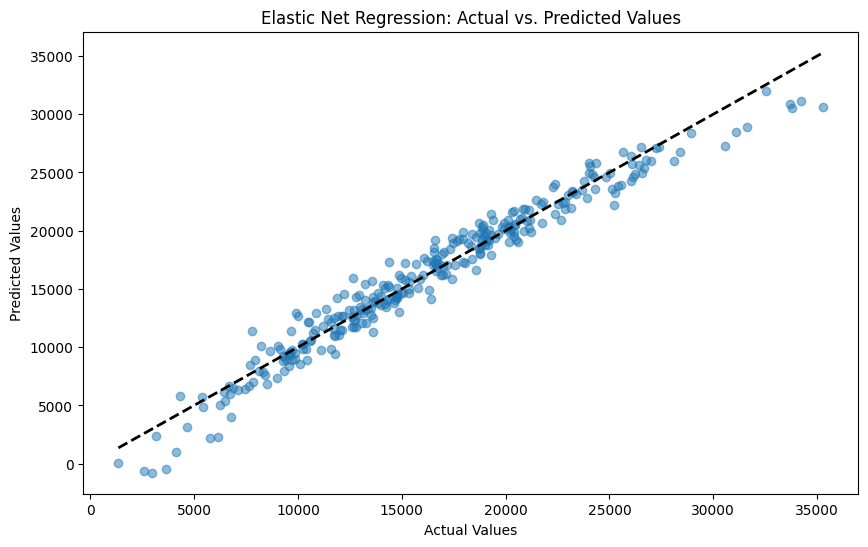

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_elastic, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Elastic Net Regression: Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Add a diagonal line
plt.show()